In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 1. Transformations (convert to tensor + normalize)
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.5,), (0.5,))
])

# 2. Load MNIST dataset
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 3. Define a simple Neural Network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)     # Second hidden layer
        self.fc3 = nn.Linear(64, 10)      # Output layer (10 digits)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten image
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNN()

# 4. Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 5. Training loop
for epoch in range(5):  # Train for 5 epochs
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/5], Loss: {running_loss/len(train_loader):.4f}")

# 6. Evaluation
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test set: {100 * correct / total:.2f}%")


100.0%
100.0%
100.0%
100.0%


Epoch [1/5], Loss: 0.3811
Epoch [2/5], Loss: 0.1809
Epoch [3/5], Loss: 0.1275
Epoch [4/5], Loss: 0.1060
Epoch [5/5], Loss: 0.0879
Accuracy on test set: 97.02%


Predicted Digit: 7


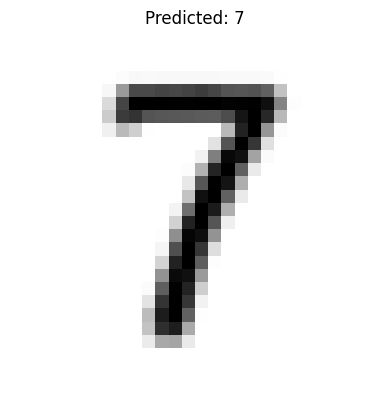

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

# Load image, convert to grayscale, resize to 28x28
img = Image.open("digit.png").convert("L").resize((28, 28))

# Convert to tensor and normalize
img_tensor = transforms.ToTensor()(img)
img_tensor = transforms.Normalize((0.5,), (0.5,))(img_tensor)

# Predict
with torch.no_grad():
    output = model(img_tensor.unsqueeze(0))
    _, predicted = torch.max(output, 1)

print(f"Predicted Digit: {predicted.item()}")

# Show the image
plt.imshow(img, cmap="gray")
plt.title(f"Predicted: {predicted.item()}")
plt.axis("off")
plt.show()





# MNIST Digit Classification with PyTorch – Step-by-Step Explanation

This project builds and trains a simple neural network to recognize handwritten digits (0–9) from the MNIST dataset using PyTorch.

---

## 1. Imports
We bring in the required modules:
- **torch, torch.nn, torch.optim** → Core PyTorch libraries for tensor computation, defining neural networks, and optimization.
- **torch.nn.functional** → Functional API for activation functions like ReLU.
- **torchvision.datasets & transforms** → Utilities for loading MNIST and applying transformations.
- **torch.utils.data.DataLoader** → Handles batching, shuffling, and parallel loading of data.

---

## 2. Data Transformation
```python
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
````

* **`ToTensor()`** → Converts image to PyTorch tensor and scales pixel values to `[0, 1]`.
* **`Normalize((0.5,), (0.5,))`** → Centers and scales pixel values to `[-1, 1]`.

---

## 3. Loading the Dataset

```python
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
```

* `train=True` loads training data; `train=False` loads test data.
* **`batch_size=64`** → Model processes 64 images at a time.
* **`shuffle=True`** → Randomizes training data order.

---

## 4. Defining the Neural Network

```python
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
```

* **Input Layer**: 784 neurons (28×28 pixels).
* **Hidden Layers**: 128 → 64 neurons.
* **Output Layer**: 10 neurons for digits 0–9.
* **ReLU Activation**: Adds non-linearity.

---

## 5. Loss Function & Optimizer

```python
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
```

* **CrossEntropyLoss** → For multi-class classification.
* **Adam Optimizer** → Adaptive learning rate for faster convergence.

---

## 6. Training Loop

```python
for epoch in range(5):
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/5], Loss: {running_loss/len(train_loader):.4f}")
```

1. Reset gradients.
2. Forward pass.
3. Compute loss.
4. Backpropagation.
5. Update weights.
6. Track loss.

---

## 7. Evaluation

```python
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on test set: {accuracy:.2f}%")
```

* No gradients needed.
* Pick predicted class with **highest score**.
* Calculate accuracy.

---

## Concepts Learned

* Preprocessing images using transforms.
* Building neural networks in PyTorch.
* Using DataLoader for batching.
* Implementing training & evaluation loops.
* Applying loss functions and optimizers effectively.

```
```

